<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/MN_T13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Regla de Simpson

In [ ]:
def Simpson_comp(f,a,b,n):
    if(n%3!=0):
        return("n debe ser multiplo de 3")
    h=(b-a)/n
    integral=0
    for k in range(int(n/3)):
        integral+=(3*h/8)*(f(a+3*k*h)+3*f(a+(3*k+1)*h)+3*f(a+(3*k+2)*h)+f(a+(3*k+3)*h))
    return(integral)

Para exp(x): [2.355648119152531, 2.350755744608991, 2.350473201915678, 2.350424908072871, 2.350411633682346]
Para 1/(1+x^2): [1.5999999999999999, 1.569230769230769, 1.5708497055942983, 1.5707917248900853, 1.570795949328916]
Grafica de errores, funcion 1:



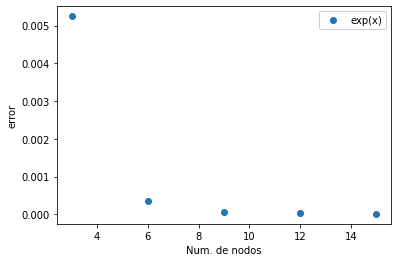


Grafica de errores, funcion 2:



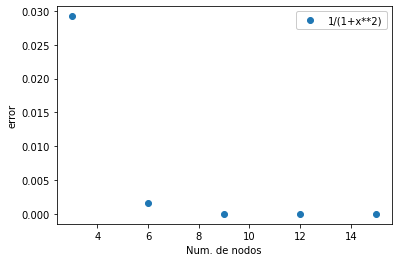

In [31]:
import math
def g(x):
    return(1/(1+x**2))
integr_f1=[]
integr_f2=[]
N=[3,6,9,12,15]
for n in N:
    integr_f1.append(Simpson_comp(np.exp,-1,1,n))
    integr_f2.append(Simpson_comp(g,-1,1,n))
print("Para exp(x):",integr_f1)
print("Para 1/(1+x^2):",integr_f2)
errores_f1=abs(np.array(integr_f1)-(np.exp(1)-np.exp(-1)))
errores_f2=abs(np.array(integr_f2)-np.pi/2)
import matplotlib.pyplot as plt
print("Grafica de errores, funcion 1:\n")
plt.plot(N,errores_f1,'o',label="exp(x)")
plt.xlabel('Num. de nodos')
plt.ylabel('error')
plt.legend(framealpha=1, frameon=True);
plt.show()
print("\nGrafica de errores, funcion 2:\n")

plt.plot(N,errores_f2,'o',label="1/(1+x**2)")
plt.xlabel('Num. de nodos')
plt.ylabel('error')
plt.legend(framealpha=1, frameon=True);
plt.show()

In [ ]:
#Newton-Legendre.
def p(n,x):#Polinomio
    sum=0
    if(n==0):
        return 1
    if(n==1):
        return x
    valor=(1/n)*((2*n-1)*x*p(n-1,x)-(n-1)*p(n-2,x))
    return(valor)
def p_prima(n,x): #Derivada
    return(((n)/(1-x**2))*(p(n-1,x)-x*p(n,x)))

In [ ]:
def Newton(f, fprime, x_0,tol_x=0,tol_f=10**(-6),iter_max=10000):
  #Input: f, f', x_0,
  #         tol_x: Tolerancia del tamaño del intervalo (default=0)
  #         tol_f: Tolerancia, criterio de paro (default=10^{-6})
  if(fprime(x_0)==0):
    return('considere otro valor inicial')
  else: 
    x_1=x_0-f(x_0)/fprime(x_0)
  iter=1
  while (abs(f(x_1))>tol_f) & (abs(x_0-x_1)>tol_x) & (iter<iter_max):
    if(fprime(x_1)==0): 
      break
    else:
      x_0=x_1
      x_1=x_0-f(x_0)/fprime(x_0)
      iter+=1
  print("Numero de iteraciones: ",iter)
  return x_1

In [ ]:
def zeros_pol_Legendre(m):
    n=m# n es la variable para construir los polinomios de Legendre de grado n.

    def p_n(x):
        return(p(n,x))
    def p_prima_n(x):
        return(p_prima(n,x))
    x_0_k=[np.cos(np.pi*(k+0.75)/(n+0.5)) for k in range(n)]
    zeros=[]
    for x_0 in x_0_k:
        zeros.append(Newton(p_n,p_prima_n,x_0,tol_f=10**(-12)))#Se van a imprimir el numero de iteraciones de cada cero.
        print("approximacion del cero: ",zeros[-1])
    return(zeros)

In [ ]:
def f_1(x): #Funcion de prueba 1
    return (x*np.cos(x))
def f_2(x): #Funcion de prueba 1
    return(np.exp(-x)*x)
def G_L_cuadratura(f,n,a,b):#Hace la traslacion y regresa la aproximacion de la integral
    def traslation(a,b,t):
        return((a+b+(b-a)*t)/2)
    zeros=zeros_pol_Legendre(n)
    c=[]
    for x in zeros:
        c.append(2/(((1-x**2))*(p_prima(n,x)**2)))
    suma=0
    for i in range(len(zeros)):
        suma+=((b-a)/2)*c[i]*f(traslation(a,b,zeros[i]))
    return suma

In [ ]:
N=[2,4,10]
approx_f1=[]
approx_f2=[]
print("-------Funcion 1:-------")
print("\n")
for n in N:
    print("Para n=",n)
    print("Iteraciones:")
    approx_f1.append(G_L_cuadratura(f_1,n,a=0,b=np.pi))
    print("Aproximacion para funcion 1: ",approx_f1[-1])
    print("-"*30)
print("\n")
print("-------Funcion 2:-------")
print("\n")

for n in N:
    print("Para n=",n)
    print("Iteraciones:")
    approx_f2.append(G_L_cuadratura(f_2,n,a=-1,b=0))    
    print("Aproximacion para funcion 2: ",approx_f2[-1])
    print("-"*30)
approx_f1=abs(np.array(approx_f1)+2)#Calcular errores 
approx_f2=abs(np.array(approx_f2)+1)

-------Funcion 1:-------


Para n= 2
Iteraciones:
Numero de iteraciones:  3
approximacion del cero:  0.5773502691896257
Numero de iteraciones:  3
approximacion del cero:  -0.5773502691896257
Aproximacion para funcion 1:  -2.2439504025573025
------------------------------
Para n= 4
Iteraciones:
Numero de iteraciones:  3
approximacion del cero:  0.8611363115940539
Numero de iteraciones:  3
approximacion del cero:  0.33998104358485626
Numero de iteraciones:  3
approximacion del cero:  -0.33998104358485626
Numero de iteraciones:  3
approximacion del cero:  -0.8611363115940539
Aproximacion para funcion 1:  -2.0001242410817954
------------------------------
Para n= 10
Iteraciones:
Numero de iteraciones:  3
approximacion del cero:  0.9739065285171726
Numero de iteraciones:  3
approximacion del cero:  0.8650633666889845
Numero de iteraciones:  3
approximacion del cero:  0.6794095682990243
Numero de iteraciones:  2
approximacion del cero:  0.43339539412925515
Numero de iteraciones:  2
approxima

Grafica de errores, funcion 1:



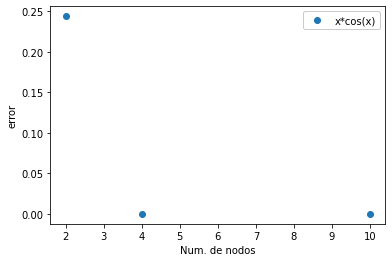


Grafica de errores, funcion 2:



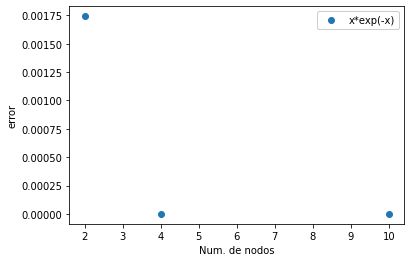

In [ ]:
import matplotlib.pyplot as plt
print("Grafica de errores, funcion 1:\n")
plt.plot(N,approx_f1,'o',label="x*cos(x)")
plt.xlabel('Num. de nodos')
plt.ylabel('error')
plt.legend(framealpha=1, frameon=True);
plt.show()
print("\nGrafica de errores, funcion 2:\n")

plt.plot(N,approx_f2,'o',label="x*exp(-x)")
plt.xlabel('Num. de nodos')
plt.ylabel('error')
plt.legend(framealpha=1, frameon=True);
plt.show()

